In [144]:
import pandas as pd

In [145]:
df = pd.read_csv('OnlineRetail.csv', encoding='latin1')

In [146]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [147]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100 * date.year + date.month)

df['Revenue'] = df['UnitPrice'] * df['Quantity']

result = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

result.head()

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121


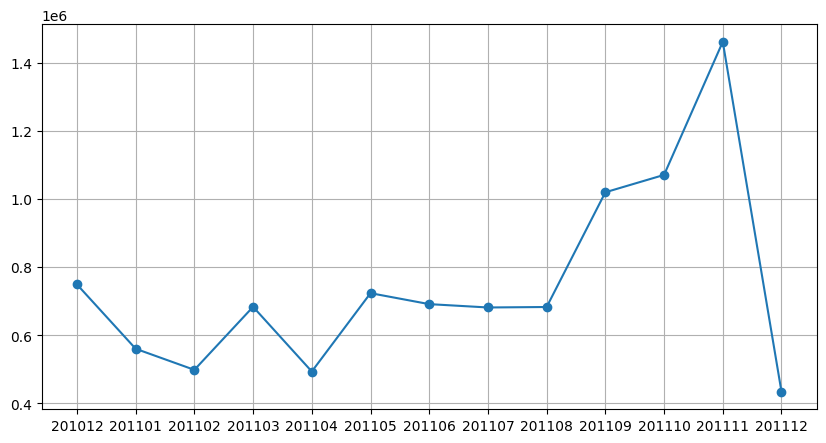

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(result['InvoiceYearMonth'].to_numpy(dtype=str), result['Revenue'], marker='o')
plt.show()

In [149]:
result['MonthlyGrowth'] = result['Revenue'].pct_change()

result.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


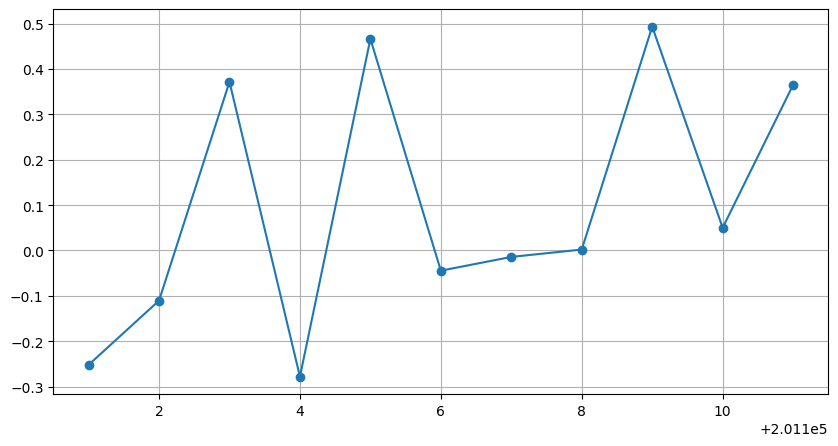

In [150]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(
    result.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
    result.query("InvoiceYearMonth < 201112")['MonthlyGrowth'],
    marker='o'
)
plt.show()

In [151]:
result = df.query("Country=='United Kingdom'").reset_index(drop=True)

result = result.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

result.head()

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817


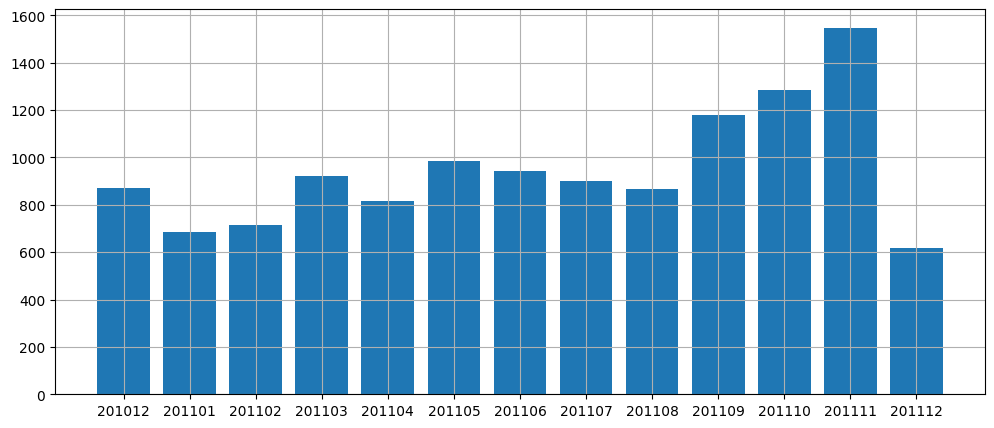

In [152]:
plt.figure(figsize=(12, 5))
plt.bar(result['InvoiceYearMonth'].to_numpy(dtype=str), result['CustomerID'])
plt.grid()
plt.show()

In [153]:
result = df.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
result.head()

,InvoiceYearMonth,Quantity
0,201012,342228
1,201101,308966
2,201102,277989
3,201103,351872
4,201104,289098


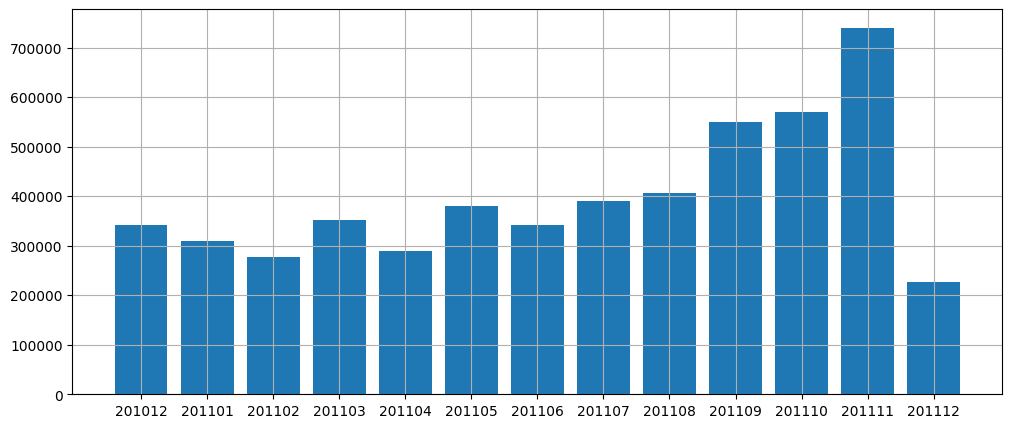

In [154]:
plt.figure(figsize=(12, 5))
plt.bar(result['InvoiceYearMonth'].to_numpy(dtype=str), result['Quantity'])
plt.grid()
plt.show()

In [155]:
result = df.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

result.head()

,InvoiceYearMonth,Revenue
0,201012,17.630400
1,201101,15.933088
2,201102,17.976058
3,201103,18.593313
4,201104,16.486399


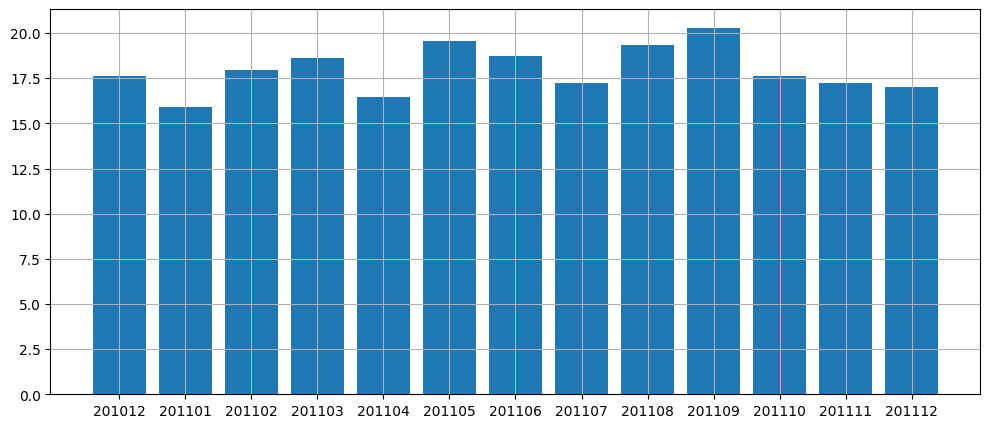

In [156]:
plt.figure(figsize=(12, 5))
plt.bar(result['InvoiceYearMonth'].to_numpy(dtype=str), result['Revenue'])
plt.grid()
plt.show()

In [157]:
result = df.groupby('CustomerID').InvoiceDate.min().reset_index()
result.columns = ['CustomerID','MinPurchaseDate']
result['MinPurchaseYearMonth'] = result['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

result = pd.merge(df, result, on='CustomerID')

result.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [158]:
result['UserType'] = 'New'
result.loc[result['InvoiceYearMonth'] > result['MinPurchaseYearMonth'],'UserType'] = 'Existing'

result_2 = result.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

result_2 = result_2.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

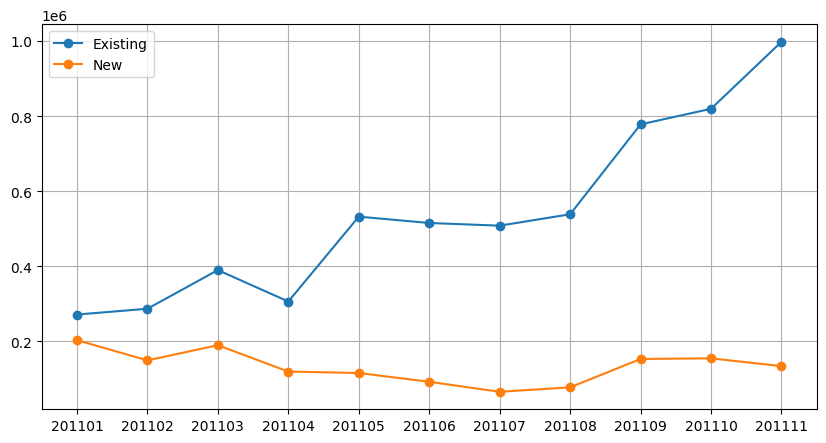

In [159]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(
    result_2.query("UserType == 'Existing'")['InvoiceYearMonth'].to_numpy(dtype=str),
    result_2.query("UserType == 'Existing'")['Revenue'],
    marker='o',
    label='Existing'
)
plt.plot(
    result_2.query("UserType == 'New'")['InvoiceYearMonth'].to_numpy(dtype=str),
    result_2.query("UserType == 'New'")['Revenue'],
    marker='o',
    label='New'
)
plt.legend(loc='upper left')
plt.show()

In [160]:
result_2 = result.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() / result.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
result_2 = result_2.reset_index()
result_2 = result_2.dropna()
result_2.head()

,InvoiceYearMonth,CustomerID
1,201101,1.162983
2,201102,0.909091
3,201103,0.758621
4,201104,0.498333
5,201105,0.348750


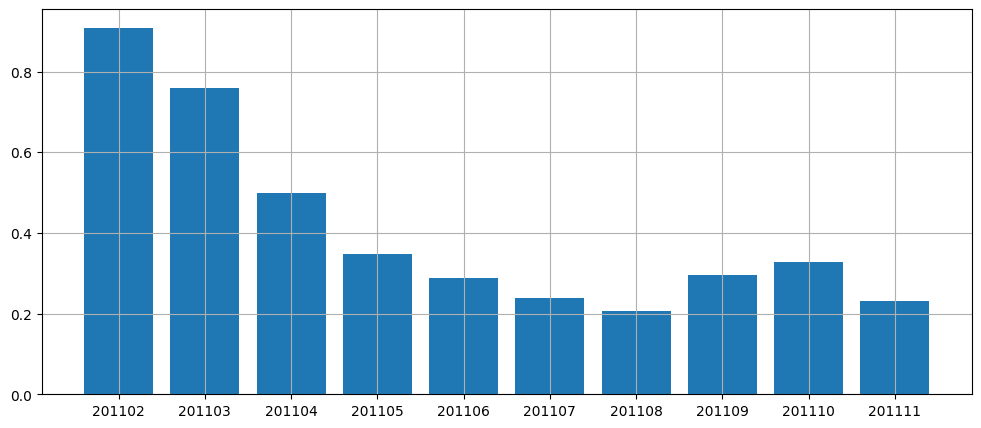

In [161]:
plt.figure(figsize=(12, 5))
plt.bar(
    result_2.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str), 
    result_2.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID']
)
plt.grid()
plt.show()

In [162]:
result_2 = result.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

result_2 = pd.crosstab(result_2['CustomerID'], result_2['InvoiceYearMonth']).reset_index()

result_2.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [163]:
months = result_2.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = result_2[selected_month].sum()
    retention_data['RetainedUserCount'] = result_2[(result_2[selected_month]>0) & (result_2[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
result_2 = pd.DataFrame(retention_array)
result_2['RetentionRate'] = result_2['RetainedUserCount']/result_2['TotalUserCount']

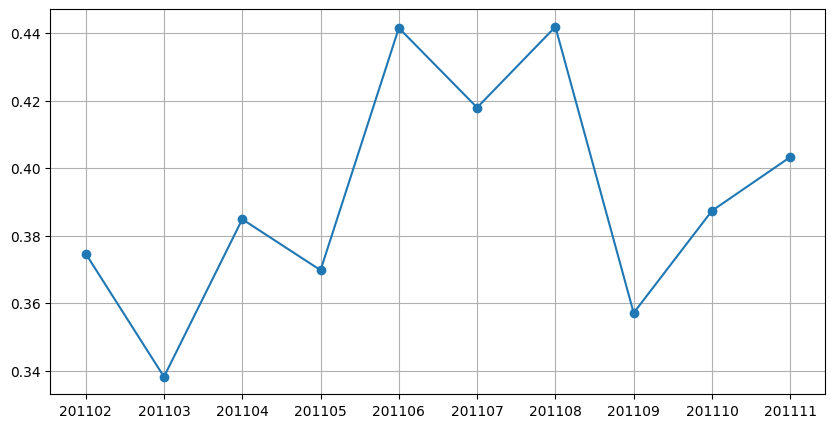

In [164]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(
    result_2.query("InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str),
    result_2.query("InvoiceYearMonth<201112")['RetentionRate'],
    marker='o',
)
plt.show()